Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the California House Price Dataset

In [3]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [4]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
# Loading the dataset to a pandas dataframe
house_price = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [6]:
# Printing the first 5 values
print(house_price.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25


In [7]:
# add the target (price) columns to the dataframe
house_price['price'] = house_price_dataset.target

In [8]:
print(house_price.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [9]:
# Checking the number of rows and columns in dataframe
house_price.shape

(20640, 9)

In [11]:
# Check for missing values
house_price.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [12]:
# statistical measures of the dataset
house_price.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correalation between the various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [13]:
correlation = house_price.corr()

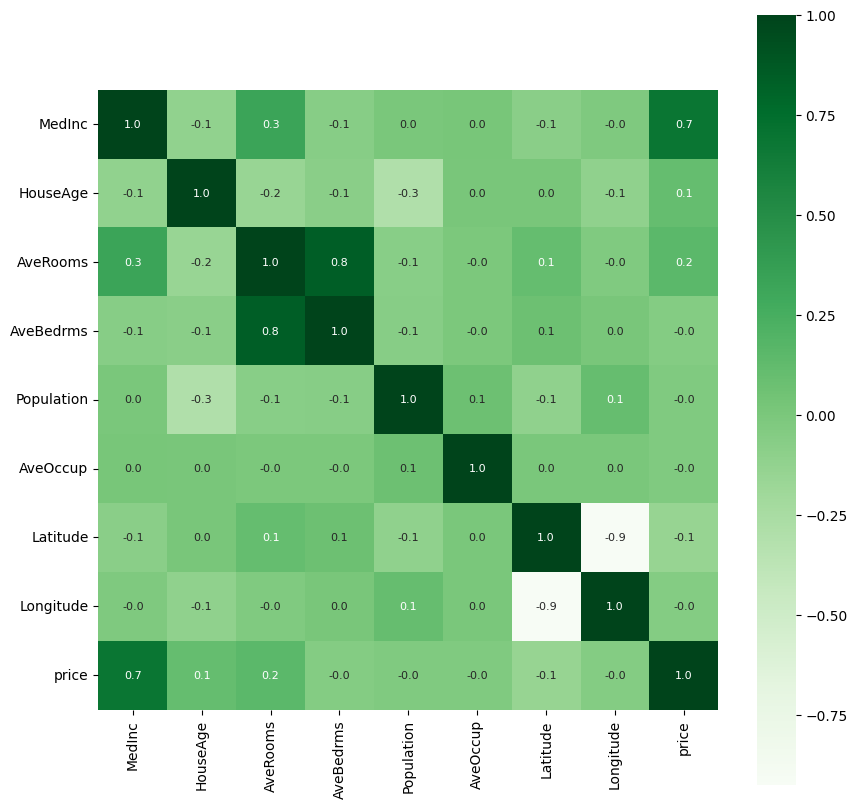

In [15]:
# constructing the heatmap to understand the correaltion
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')
plt.show()

#cbar = bar at right hand size
#square = all values in square
# fmt = 1f --> one value after the decimal point
#annot = feature names on the right and values in cell
# annot_kws = size of values
#cmap = color of heatmap

Splitting the data and Target

In [17]:
X = house_price.drop(['price'], axis = 1)
Y = house_price['price']

In [18]:
print (X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [19]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


Splitting the data into training and test data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
print(X.shape)

(20640, 8)


In [22]:
print(x_train.shape)

(16512, 8)


In [23]:
print(x_test.shape)

(4128, 8)


Model Training

XGBoost Regressor

In [24]:
# Loading the model

model = XGBRegressor()

In [26]:
# training the model with x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [27]:
# accuracy for prediction on training data
y_pred_x_train = model.predict(x_train)

In [28]:
print(y_pred_x_train)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [30]:
# Squared error
score_1 = metrics.r2_score(y_train, y_pred_x_train)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, y_pred_x_train)

print('R squared error :', score_1)
print('Mean absolute error :', score_2)

R squared error : 0.943650140819218
Mean absolute error : 0.1933648700612105


Visualizing the actual prices and predicted prices

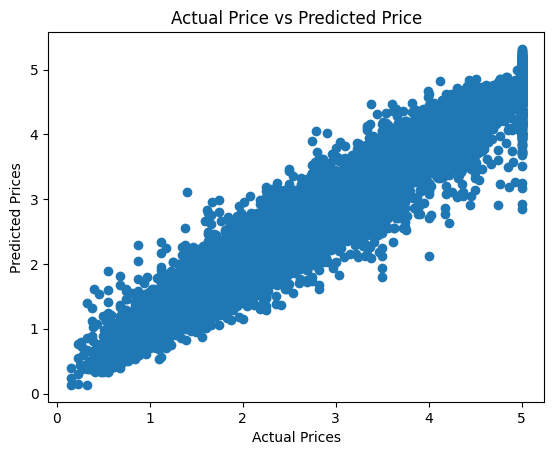

In [34]:
plt.scatter(y_train, y_pred_x_train)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

Prediction on test data

In [31]:
# accuracy for prediction on training data
y_pred_x_test = model.predict(x_test)

In [32]:
print(y_pred_x_test)


[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [33]:
# Squared error
score_1 = metrics.r2_score(y_test, y_pred_x_test)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, y_pred_x_test)

print('R squared error :', score_1)
print('Mean absolute error :', score_2)

R squared error : 0.8338000331788725
Mean absolute error : 0.3108631800268186
